# Types of Tensors



In [2]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from six.moves import urllib
import tensorflow.compat.v2.feature_column as fc

In [3]:
# Reshape

t = tf.ones([5,5,5,5])
t = tf.reshape(t, [125,-1])


In [4]:
# Linear Regression

# load_dataset

dftrain = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv") # Training data
dfeval = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/eval.csv")
y_train2 = dftrain['survived']

dftrain.head(10)

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y
5,0,male,2.0,3,1,21.0750,Third,unknown,Southampton,n
6,1,female,27.0,0,2,11.1333,Third,unknown,Southampton,n
7,1,female,14.0,1,0,30.0708,Second,unknown,Cherbourg,n
8,1,female,4.0,1,1,16.7000,Third,G,Southampton,n
9,0,male,20.0,0,0,8.0500,Third,unknown,Southampton,y


In [5]:
dftrain = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv") # Training data
dfeval = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/eval.csv")
y_train = dftrain['survived']
y_eval = dfeval.pop('survived')

CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
    vocabulary = dftrain[feature_name].unique()
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))
    
for feature_name in NUMERIC_COLUMNS:
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))
feature_columns  

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.strin

In [ ]:
list(dftrain.columns)

<AxesSubplot:>

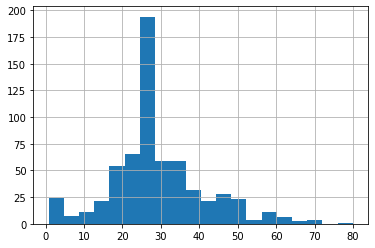

In [8]:
dftrain['age'].hist(bins=20)